## Problem Set 7
MGMT 860/960 Deterministic Methods in Operations Research

Chris Gervais - 20042208

## Problem 1:
First, we build the graph using the `networkx` library. We initially use an implementation of Dijkstra's shortest path algorithm contained in the `networkx` library and display the result. Finally, we provide a custom implementation of Dijkstra’s shortest path algorithm and demonstrate our implementation finds the same solution as the open source solution in `networkx.dijkstra_path()`.

### Building the graph:

NetworkX shortest path: ['A', 'C', 'D', 'E', 'G']


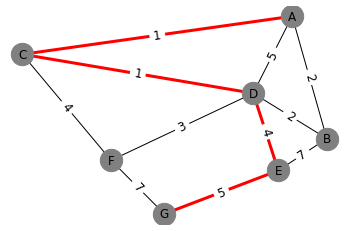

In [592]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import cm
from math import inf, exp

nodes = "ABCDEFG"
edges = [
    ("A", "B", 2),
    ("A", "C", 1),
    ("A", "D", 5),
    ("B", "D", 2),
    ("B", "E", 7),
    ("C", "D", 1),
    ("C", "F", 4),
    ("D", "E", 4),
    ("D", "F", 3),
    ("E", "G", 5),
    ("F", "G", 7),
]

edge_labels = {}
for i, j, weight in edges:
    edge_labels[(i, j)] = weight

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_weighted_edges_from(edges)
pos = nx.spectral_layout(g) 

shortest_path = nx.dijkstra_path(g, "A", "G")
shortest_path.append(None)
shortest_colours={}
shortest_weights={}
i = 0
while shortest_path[i] != "G":
    j = i + 1
    edge = (shortest_path[i], shortest_path[j])
    shortest_colours[edge] = "red"
    shortest_weights[edge] = 3
    i += 1

edge_colours = []
edge_weights = []
for edge in g.edges():
    try:
        edge_colours.append(shortest_colours[edge])
        edge_weights.append(shortest_weights[edge])
    except KeyError:
        edge_colours.append("black")
        edge_weights.append(1)

nx.draw_networkx_edge_labels(g, pos, 
    edge_labels=edge_labels, font_color='black', font_size=12)

nx.draw_spectral(g, with_labels=True, width=edge_weights, 
                 edge_color=edge_colours, 
                 node_color="grey", node_size=500)

print(f'NetworkX shortest path: {nx.dijkstra_path(g, "A", "G")}')

plt.show()

In [593]:
def my_dijkstra_algorithm(graph, source, sink):
    dist_from_source = {
        node: {"dist": inf, "previous_node": "A"} 
        for node in graph.nodes()
    }
    dist_from_source[source]["dist"] = 0

    dict_node_length = {source: 0}
    while dict_node_length :
        source_node = min(dict_node_length, key = lambda k: dict_node_length[k])
        del dict_node_length[source_node]

        for adjacent_node, weight_dict in graph[source_node].items():
            length_to_adjnode = weight_dict["weight"]
            adj_dist = dist_from_source[adjacent_node]["dist"]
            source_dist = dist_from_source[source_node]["dist"]

            if adj_dist > source_dist + length_to_adjnode:
                dist_from_source[adjacent_node]["dist"] = source_dist + length_to_adjnode
                dict_node_length[adjacent_node] = dist_from_source[adjacent_node]["dist"]
                dist_from_source[adjacent_node]["previous_node"] = source_node
            
    node = sink
    path = [node]
    while node is not source:
        node = dist_from_source[node]["previous_node"]
        path.append(node)
    
    for node in graph.nodes() :
        print(f"Source: {source} -> Sink {node}: ",
              f"{str(dist_from_source[node])}")
        
    print(f'\nThe optimal path is {[node for node in reversed(path)]} ', 
          f'and is {dist_from_source[sink]["dist"]} units long.')
    return dist_from_source

In [594]:
dist_from_source = my_dijkstra_algorithm(g, "A", "G")

Source: A -> Sink A:  {'dist': 0, 'previous_node': 'A'}
Source: A -> Sink B:  {'dist': 2, 'previous_node': 'A'}
Source: A -> Sink C:  {'dist': 1, 'previous_node': 'A'}
Source: A -> Sink D:  {'dist': 2, 'previous_node': 'C'}
Source: A -> Sink E:  {'dist': 6, 'previous_node': 'D'}
Source: A -> Sink F:  {'dist': 5, 'previous_node': 'C'}
Source: A -> Sink G:  {'dist': 11, 'previous_node': 'E'}

The optimal path is ['A', 'C', 'D', 'E', 'G']  and is 11 units long.


## Problem 2:

Here, we formulate the question as a network problem by representing each doctor as a supply node, each vacation day as a demand node, and each arc between them as the doctor's availability to work that vacation day. Formally;

Let $a_{i,j,d}$ be the avaiability of doctor $i$ to work on day $d$ in vacatation period $j$, which is 1 if day $d$ $\in S_i$, the set of available vacation days for doctor $i$, and some large number $M$ otherwise. Further, let $w_{i, j, d}$ be the decision to allocate doctor $i$ to work on day $d$ in vacation period $j$, where 1 represents doctor $i$ working day $d$, and 0 represents a day off for doctor $i$ on day $d$. Finally, let $m_j$ denote the number of days in the set of continguous days in $D_j$. Then this problem can be formulated as:

$$
\begin{array}{l@{\quad} r c l}
    \mathrm{minimize}       &  \sum_{i=1}^{n} \sum_{j=1}^{k} \sum_{d=1}^{m_j} a_{i, j, d} w_{i, j, d}  \\
    \mathrm{subject~to} &   \sum_{d=1}^{m_j} w_{i, j, d} & \le & 1 & \forall i \in n, \forall j \in k\\
    &   \sum_{j=1}^{k} \sum_{d=1}^{m_j} w_{i, j, d} & \le & c & \forall i \in n\\
    &  \sum_{i=1}^{n} w_{i, j, d} & = & 1 & \forall d \in m_j \forall j \in k \\
 \end{array}
$$

## Problem 3:

Each of $n$ teams plays against every other team a total of $k$ games. Assume that every game ends in a win or a loss (no draws) and let $x_i$ be the number of wins of team $i$. Let $X$ be the set of all possible outcome vectors $(x_1, \ldots, x_n)$. Given an arbitrary vector $(x_1, \ldots, x_n)$, we would like to determine whether it belongs to $X$, that is, whether it is a possible tournament outcome vector. Provide a network formulation of this problem.

First, we introduce a supply node for each of the $n$ teams, $T_1, \ldots, T_n$, with supply capacity of $x_i$, the total number of games won by team $i$. Next, for every unordered pair of $i$, $j$ teams, we introduce game nodes $G_{i, j}$ which have demand $k$, the total number of games played between any two teams. There are two arcs that come into a node $G_{i,j}$; one from $T_i$ and one from $T_j$. The flow from $T_i$ to $G_{i,j}$ represents the total number of wins for team $i$ when they played team $j$. Since there are no draws, the total number of games must be equal to the total number of wins, and therefore $\sum_{i=1}^{n}  x_i = n(n-1)k/2$. Finally, we note that a network flow problem constructed in such a way is feasible if and only if the vector $(x_1, \ldots, x_n)$ belongs to the set $X$ of all possible outcome vectors.

## Problem 4:

$\mathbf 1:$ $f(x) = x^2 + e^{x^2}$

The Hessian matrix for this function is the single entry matrix $(4e^{x^2}x^2 + 2e^{x^2} + 2)$. We note that all $x$ terms are squared and the function is greater than 0 $\forall x \in \mathbb{R}$. As a result, the Hessian is positive definite and the function is strictly convex.

$\mathbf 2:$ $f(x_1, x_2) = 2x_1^2 + 4x_1x_2 - 10x_1 + 5x_2$

The Hessian matrix for this function is:

\begin{bmatrix}
 4 & 4  \\
 4 & 0  \\ 
\end{bmatrix}

This matrix has eigenvalues ($\lambda_{1} = 6.47$, $\lambda_{2} = -2.47$). As a result, the Hessian is indefinite and the original function is none of the above. 

$\mathbf 3:$ $f(x_1, x_2) = x_1e^{-(x_1+x_2)}$

The Hessian matrix for this function is 

\begin{bmatrix}
e^{-x_1 - x_2}x_1 - 2e^{-x_1-x_2} & e^{-x_1-x_2}x_1 - e^{-x_1-x_2} \\
e^{-x_1-x_2}x_1 - e^{-x_1-x_2} & e^{-x_1-x_2}x_1 \\
\end{bmatrix}

Or, alternatively:

\begin{bmatrix}
e^{-x_1 - x_2}(x_1 - 2) & e^{-x_1-x_2}(x_1 - 1)\\
e^{-x_1-x_2}(x_1 - 1) & e^{-x_1-x_2}x_1 \\
\end{bmatrix}

We now look at each function in turn and comment on how they vary in $(x_1, x_2)$, and display a linearized approximation of the resulting contour plot.

In [595]:
def display_contour_plot(f):

    fig = plt.figure(figsize=(6,5))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes([left, bottom, width, height]) 

    start, stop, n_values = -5, 5, 1000

    x1_vals = np.linspace(start, stop, n_values)
    x2_vals = np.linspace(start, stop, n_values)
    X_1, X_2 = np.meshgrid(x1_vals, x2_vals)

    Z = f(X_1, X_2)

    norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

    cp = plt.contourf(X, Y, Z)
    plt.colorbar(cp)

    ax.set_title('Contour plot of $b(x_1, x_2)$')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    plt.show()
    
def f_1(X_1, X_2):
    return np.exp(-X_1-X_2)*(X_1 - 2)

def f_2(X_1, X_2):
    return np.exp(-X_1-X_2)*(X_1 - 1)

def f_3(X_1, X_2):
    return np.exp(-X_1-X_2)*(X_1)

$f_1(x_1, x_2) = e^{-x_1 - x_2}(x_1 - 2)$ : has a root at $x_1 = 2$.

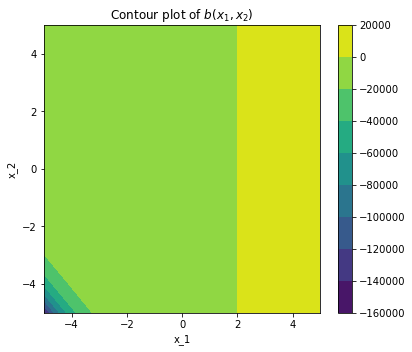

In [596]:
display_contour_plot(f_1)

$f_2(x_1, x_2) = e^{-x_1-x_2}(x_1 - 1)$: has a root at $x_1 = 1$. 

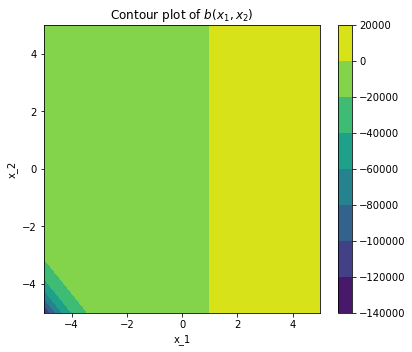

In [597]:
display_contour_plot(f_2)

$f_3(x_1, x_2) = e^{-x_1-x_2}x_1$: has a root at $x_1 = 0$

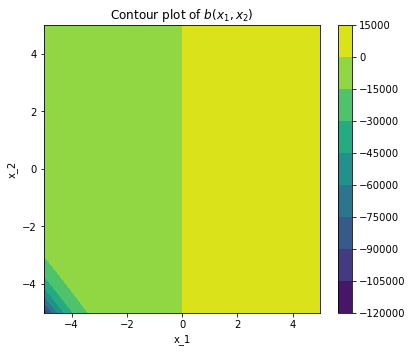

In [598]:
display_contour_plot(f_3)

Noting the change in curvature across sample values of $x_1, x_2 \in [-4, 4]$, we note that the Hessian is indefinite and the original function is none of the above.

$\mathbf 4:$ $f(x_1, x_2, x_3) = -x_1^2 - 3x_2^2 + 4x_1x_2 + 2x_1x_3 + 4x_2x_3$

The Hessian matrix for this function is:

\begin{bmatrix}
 -2 & 4 & 2  \\
 4 & -6 & 4  \\ 
 2 & 4 & 0 \\
\end{bmatrix}

This matrix has eigenvalues $(\lambda_{1} = -3.7$, $\lambda_{2} = 9.7$, $\lambda_{3} = -2.0)$. As a result, the Hessian is indefinite and the original function is none of the above.

## Problem 5:

(Exercise 1.1.1 from Nonlinear Programming) For each value of the scalar $\beta$, find the set of all stationary points of the following function:

$$f(x, y) = x^2 + y^2 + \beta xy + x + 2y$$

Which of these stationary points are global minima?

First, we calculate the partial derivatives of the function.

$\frac{df}{dx} = 2x + \beta y + 1$

$\frac{df}{dy} = \beta x + 2y + 2$

Setting both of these equations to zero, and putting forming the matrix solution:

$$ \mathbf A\mathbf x = \mathbf b$$

$$\mathbf A = \begin{bmatrix}
2 & \beta   \\
 \beta & 2  \\ 
\end{bmatrix},
\mathbf x = \begin{bmatrix}
 x   \\
 y  \\ 
\end{bmatrix},
\mathbf b = \begin{bmatrix}
 -1   \\
 -2  \\ 
\end{bmatrix}
$$

We note two important items. First, if we fix $\beta$ to be a constant value, we also fix the solution $(x, y)$ and the corresponding $f(x, y)$. Second, when solving this system of linear equations, this matrix will not be invertible when $det(A) = 0$.

$det(A) = 4 - \beta^2 = 0$

As a result, when $\beta = \pm 2$ there are no solutions to the linear system of equations. However, we show below that the $\lim_{\beta \to -2} f(x) = -\infty$. Therefore, there will always be some arbitrarily small amount we can add to $\beta$ as $\beta \to -2$ from the direction of $\beta = 0$ that will produce a lower value of $f(x, y)$. Therefore, none of these stationary points are global minima.

In [599]:
def z(x, y, beta):
    return (x**2 + y**2 + beta*x*y + x + 2*y)

solutions = {}
for b in np.linspace(-2.1, -1.9, 5000):
    A = np.matrix([[2, b], [b, 2]])
    B = np.matrix([[-1], [-2]])
    x, y = np.linalg.inv(A).dot(B)
    x = x.item(0)
    y = y.item(0)
    
    solutions[b] = {
        "x": x,
        "y": y,
        "z": z(x, y, b),
        "b": b,
    }


d = {
        (val["x"], val["y"], val["b"]): val["z"] 
         for val in solutions.values()
    }

key = min(d, key=d.get)
print(f"beta = {key[2]}",
      f"x = {round(key[0],2)},"
      f"y = {round(key[1], 2)}")

print(f"f(x, y) = {round(d[key], 2)}")

b_vals = list(solutions.keys())
z_vals = [solutions[b]['z'] for b in b_vals]

beta = -1.9999799959991997 x = -74984.87,y = -74985.13
f(x, y) = -112477.56


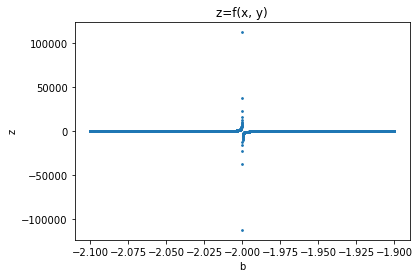

In [600]:
pd.DataFrame({'b': b_vals, 'z': z_vals}).plot.scatter(
    x='b', y='z', s=3, title="z=f(x, y)")
plt.show()